### Load Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('final_ford.csv').drop('Unnamed: 0' , axis=1)

In [2]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


In [3]:
df.shape

(17966, 9)

### Split Data to [ train , test ]

In [4]:
X = df[ ['model' , 'year' , 'transmission' , 'mileage' , 'fuelType', 'tax' , 'mpg' , 'engineSize' ] ]
y = df['price'].to_numpy().reshape(-1,1).ravel()

In [5]:
m1 = X.mean()
s1 = X.std()
X2 = (X - m1) / s1

In [6]:
m2 = y.mean()
s2 = y.std()
y2 = (y - m2) / s2

In [7]:
X.shape

(17966, 8)

In [8]:
y.shape

(17966,)

In [9]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(X2,y2 ,test_size=.25 , shuffle=True , random_state=43 )

### Create Models and Evaluate it

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor





gbr = GradientBoostingRegressor(n_estimators=200,learning_rate=0.5,max_depth=5,random_state=43 ,min_samples_split = 5)

lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.1, max_depth=12,)

catboost = CatBoostRegressor(iterations=500, depth=8, learning_rate=0.1, loss_function='RMSE',verbose=0,random_seed=43)


parm_xgb = {'subsample': 0.9, 'n_estimators': 200, 
                'min_child_weight': 5, 'max_depth': 9, 
                'learning_rate': 0.1, 'colsample_bytree': 0.8,
               'objective' : 'reg:squarederror'}

xgb = xgb.XGBRegressor(**parm_xgb)

parm_rf = {'random_state' : 43,'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 150}

rf = RandomForestRegressor(**parm_rf)

In [11]:
from sklearn.ensemble import VotingRegressor


estimators = [('xgb', xgb), 
              ('rf', rf) , 
              ('gbr' , gbr) , 
              ('catboost' , catboost), 
              ('lgbm',lgbm)]
ensemble = VotingRegressor(estimators=estimators,verbose=True)

In [12]:
ensemble.fit(xtrain, ytrain)

[Voting] ...................... (1 of 5) Processing xgb, total=   4.0s
[Voting] ....................... (2 of 5) Processing rf, total=  10.6s
[Voting] ...................... (3 of 5) Processing gbr, total=   9.5s
[Voting] ................. (4 of 5) Processing catboost, total=   7.9s
[Voting] ..................... (5 of 5) Processing lgbm, total=   1.2s


VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                             RandomForestRegressor(max_depth=20,
                                

In [13]:
train_accuracy = ensemble.score(xtrain, ytrain)
test_accuracy = ensemble.score(xtest, ytest)

print("Train Accuracy (R^2 Score) :", round(train_accuracy,3))
print("Test Accuracy (R^2 Score) :", round(test_accuracy,3))

Train Accuracy (R^2 Score) : 0.972
Test Accuracy (R^2 Score) : 0.94


In [14]:
predictions = ensemble.predict(xtest)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


mse = mean_squared_error(ytest, predictions)
mae = mean_absolute_error(ytest, predictions)
r2 = r2_score(ytest, predictions)


print("Mean Squared Error: ", round(mse , 3) )
print("Mean Absolute Error: ", round(mae , 3))
print("R-squared: ", round(r2 , 3))

Mean Squared Error:  0.062
Mean Absolute Error:  0.167
R-squared:  0.94


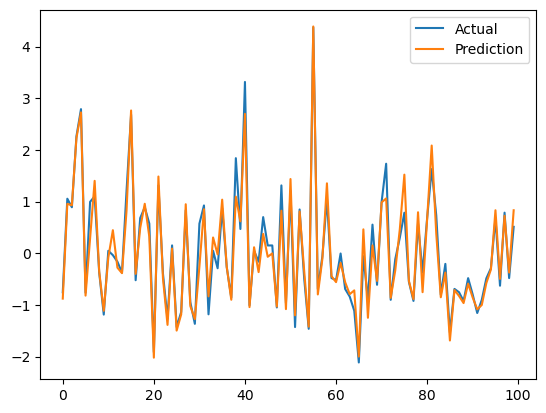

In [15]:
import matplotlib.pyplot as plt

_1 = 100
_ = [i for i in range(_1)]

plt.plot(_,ytest[:_1] )
plt.plot(_,predictions[:_1])


plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()

In [16]:
predictions = ensemble.predict(xtrain)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


mse = mean_squared_error(ytrain, predictions)
mae = mean_absolute_error(ytrain, predictions)
r2 = r2_score(ytrain, predictions)


print("Mean Squared Error: ", round(mse , 3) )
print("Mean Absolute Error: ", round(mae , 3))
print("R-squared: ", round(r2 , 3))

Mean Squared Error:  0.028
Mean Absolute Error:  0.124
R-squared:  0.972


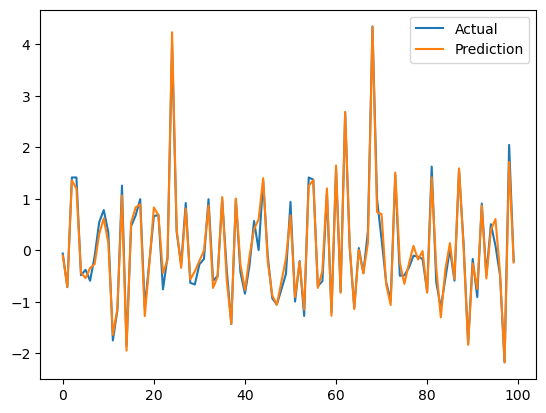

In [17]:
_1 = 100
_ = [i for i in range(_1)]

plt.plot(_,ytrain[:_1] )
plt.plot(_,predictions[:_1])


plt.legend(['Actual', 'Prediction'], loc='upper right')
plt.show()